In [57]:
import xarray as xr
import os
import pandas as pd
import numpy as np
import functions.eddy_feedback as ef

import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

In [58]:
efp_df = pd.read_csv('/home/links/ct715/eddy_feedback/chapter1/efp_random/data/daily_efp_8models.csv', index_col=0)

# Load data and separate JRA55
pamip = pd.read_csv('/home/links/ct715/eddy_feedback/chapter1/efp_random/data/daily_efp_8models+jra55.csv', index_col=0)
jra = pamip[pamip['model'] == 'JRA55'].copy().reset_index(drop=True)
pamip = pamip.drop(8)


# Import original EFP data for comparison
og_efp = pd.read_csv('/home/links/ct715/eddy_feedback/chapter1/efp_random/data/non-regridded_efp.csv', index_col=0)
og_efp_matched = og_efp[og_efp['model'].isin(efp_df['model'])].reset_index(drop=True)

# fabricate and add AWI into the dataframe
og_efp_matched.loc[len(og_efp_matched)] = ["AWI-CM-1-1-MR", 0.3724, 0.4354]
og_efp_matched = og_efp_matched.sort_values(by='model').reset_index(drop=True)

# Calculate EFP for JRA55 reanalysis data using SRIP dataset
og_jra_path = '/home/links/ct715/data_storage/reanalysis/srip_datasets'
og_ds = xr.open_mfdataset(f'{og_jra_path}/JRA55_srip_ubar_div1.nc')
og_nh_efp = ef.calculate_efp(og_ds, data_type='reanalysis', which_div1='div1_pr')
og_sh_efp = ef.calculate_efp(og_ds, data_type='reanalysis', which_div1='div1_pr', calc_south_hemis=True)
og_efp_matched.loc[len(og_efp_matched)] = ["JRA55", og_nh_efp, og_sh_efp]

# Separate JRA55 from the rest of the dataframe
og_jra_efp = og_efp_matched[og_efp_matched['model'] == 'JRA55'].copy().reset_index(drop=True)
og_efp_matched = og_efp_matched.drop(8)

## Comparing on the same figure

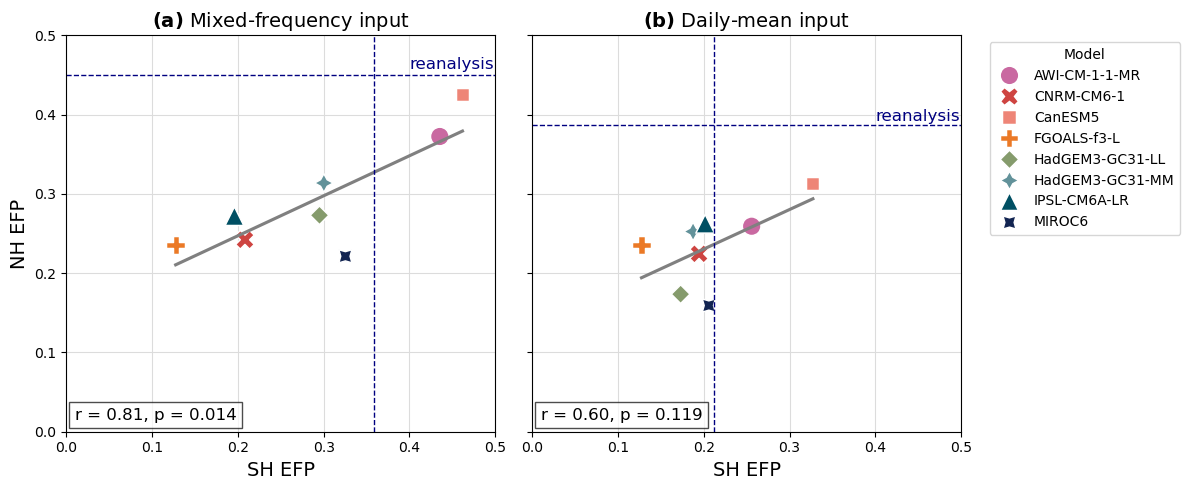

In [59]:
# colours
from pypalettes import load_cmap
cmap = load_cmap("Cross")
models = efp_df['model'].unique()
colors = [cmap(i / (len(models) - 1)) for i in range(len(models))]
palette = dict(zip(models, colors))

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True, sharey=True)

# Panel (a)
sns.regplot(ax=axes[0], data=og_efp_matched, x='efp_sh', y='efp_nh',
            scatter_kws={'color': 'white'}, line_kws={"color": "gray"}, ci=None)
sns.scatterplot(ax=axes[0], data=og_efp_matched, x='efp_sh', y='efp_nh',
                hue='model', style='model', s=180, palette=palette)

r, p = sp.stats.pearsonr(x=og_efp_matched['efp_nh'], y=og_efp_matched['efp_sh'])
axes[0].text(0.02, 0.03, f"r = {r:.2f}, p = {p:.3f}", transform=axes[0].transAxes,
             bbox=dict(facecolor="white", alpha=0.7), fontsize=12)
axes[0].text(0.8, 0.915, f"reanalysis", transform=axes[0].transAxes,
             color='navy', fontsize=12)

axes[0].set_xlabel('SH EFP', fontsize=14)
axes[0].set_ylabel('NH EFP', fontsize=14)
axes[0].set_xlim(0, 0.5)
axes[0].set_ylim(0, 0.5)
axes[0].axvline(og_jra_efp['efp_sh'].values[0], color='navy', linestyle='--', linewidth=1)
axes[0].axhline(og_jra_efp['efp_nh'].values[0], color='navy', linestyle='--', linewidth=1)
axes[0].set_title('$\\bf{(a)}$ Mixed-frequency input', fontsize=14)
axes[0].legend_.remove()
axes[0].grid(visible=True, color='gainsboro')
axes[0].set_axisbelow(True)

# Panel (b)
sns.regplot(ax=axes[1], data=pamip, x='efp_sh', y='efp_nh',
            scatter_kws={'color': 'white'}, line_kws={"color": "gray"}, ci=None)
sns.scatterplot(ax=axes[1], data=pamip, x='efp_sh', y='efp_nh',
                hue='model', style='model', s=180, palette=palette)

r, p = sp.stats.pearsonr(x=pamip['efp_nh'], y=pamip['efp_sh'])
axes[1].text(0.02, 0.03, f"r = {r:.2f}, p = {p:.3f}", transform=axes[1].transAxes,
             bbox=dict(facecolor="white", alpha=0.7), fontsize=12)
axes[1].text(0.8, 0.785, f"reanalysis", transform=axes[1].transAxes,
             color='navy', fontsize=12)

axes[1].set_xlabel('SH EFP', fontsize=14)
axes[1].set_ylabel('')  # no label on right subplot
axes[1].set_xlim(0, 0.5)
axes[1].set_ylim(0, 0.5)
axes[1].axvline(jra['efp_sh'].values[0], color='navy', linestyle='--', linewidth=1)
axes[1].axhline(jra['efp_nh'].values[0], color='navy', linestyle='--', linewidth=1)
axes[1].set_title('$\\bf{(b)}$ Daily-mean input', fontsize=14)
axes[1].legend_.remove()
axes[1].grid(visible=True, color='gainsboro')
axes[1].set_axisbelow(True)

# Move legend outside the left panel now
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Model')

plt.tight_layout()

save_path = '/home/links/ct715/eddy_feedback/chapter1/zz_paper_plots'
# plt.savefig(os.path.join(save_path, 'sub-daily_vs_daily.png'), bbox_inches='tight')
plt.show()


# Falsify MIROC6

In [60]:
og_efp_matched.loc[7, 'efp_nh'] = pamip.loc[7, 'efp_nh']
og_efp_matched.loc[7, 'efp_sh'] = pamip.loc[7, 'efp_sh']

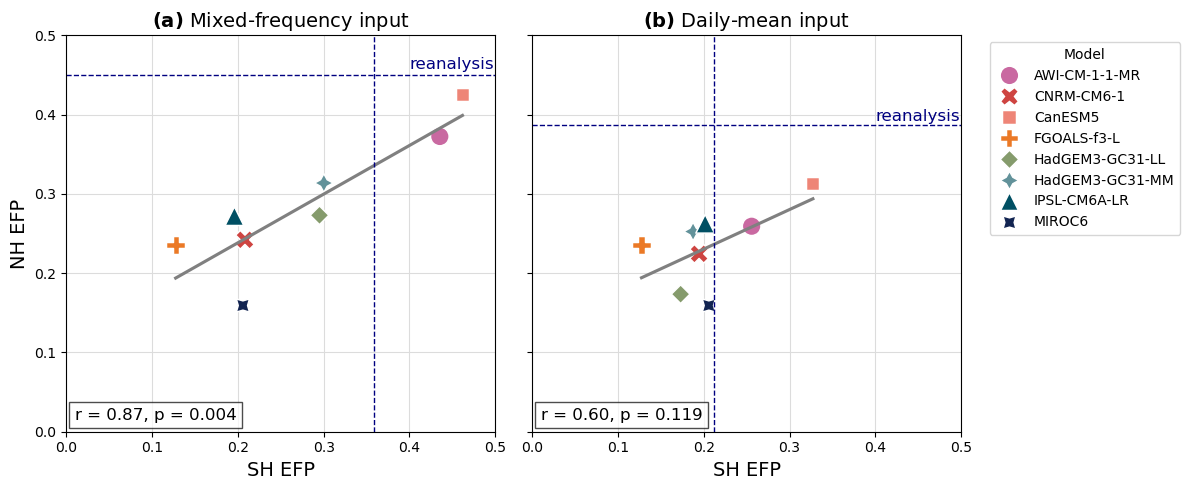

In [61]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True, sharey=True)

# Panel (a)
sns.regplot(ax=axes[0], data=og_efp_matched, x='efp_sh', y='efp_nh',
            scatter_kws={'color': 'white'}, line_kws={"color": "gray"}, ci=None)
sns.scatterplot(ax=axes[0], data=og_efp_matched, x='efp_sh', y='efp_nh',
                hue='model', style='model', s=180, palette=palette)

r, p = sp.stats.pearsonr(x=og_efp_matched['efp_nh'], y=og_efp_matched['efp_sh'])
axes[0].text(0.02, 0.03, f"r = {r:.2f}, p = {p:.3f}", transform=axes[0].transAxes,
             bbox=dict(facecolor="white", alpha=0.7), fontsize=12)
axes[0].text(0.8, 0.915, f"reanalysis", transform=axes[0].transAxes,
             color='navy', fontsize=12)

axes[0].set_xlabel('SH EFP', fontsize=14)
axes[0].set_ylabel('NH EFP', fontsize=14)
axes[0].set_xlim(0, 0.5)
axes[0].set_ylim(0, 0.5)
axes[0].axvline(og_jra_efp['efp_sh'].values[0], color='navy', linestyle='--', linewidth=1)
axes[0].axhline(og_jra_efp['efp_nh'].values[0], color='navy', linestyle='--', linewidth=1)
axes[0].set_title('$\\bf{(a)}$ Mixed-frequency input', fontsize=14)
axes[0].legend_.remove()
axes[0].grid(visible=True, color='gainsboro')
axes[0].set_axisbelow(True)

# Panel (b)
sns.regplot(ax=axes[1], data=pamip, x='efp_sh', y='efp_nh',
            scatter_kws={'color': 'white'}, line_kws={"color": "gray"}, ci=None)
sns.scatterplot(ax=axes[1], data=pamip, x='efp_sh', y='efp_nh',
                hue='model', style='model', s=180, palette=palette)

r, p = sp.stats.pearsonr(x=pamip['efp_nh'], y=pamip['efp_sh'])
axes[1].text(0.02, 0.03, f"r = {r:.2f}, p = {p:.3f}", transform=axes[1].transAxes,
             bbox=dict(facecolor="white", alpha=0.7), fontsize=12)
axes[1].text(0.8, 0.785, f"reanalysis", transform=axes[1].transAxes,
             color='navy', fontsize=12)

axes[1].set_xlabel('SH EFP', fontsize=14)
axes[1].set_ylabel('')  # no label on right subplot
axes[1].set_xlim(0, 0.5)
axes[1].set_ylim(0, 0.5)
axes[1].axvline(jra['efp_sh'].values[0], color='navy', linestyle='--', linewidth=1)
axes[1].axhline(jra['efp_nh'].values[0], color='navy', linestyle='--', linewidth=1)
axes[1].set_title('$\\bf{(b)}$ Daily-mean input', fontsize=14)
axes[1].legend_.remove()
axes[1].grid(visible=True, color='gainsboro')
axes[1].set_axisbelow(True)

# Move legend outside the left panel now
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Model')

plt.tight_layout()

save_path = '/home/links/ct715/eddy_feedback/chapter1/zz_paper_plots'
# plt.savefig(os.path.join(save_path, 'sub-daily_vs_daily.png'), bbox_inches='tight')
plt.show()


# Compare all models vs subset

In [62]:
og_efp['model'] = og_efp['model'].replace('ECHAM6.3', 'AWI-CM-1-1-MR')
og_efp = og_efp.sort_values(by='model').reset_index(drop=True)
og_efp

,model,efp_nh,efp_sh
0,AWI-CM-1-1-MR,0.0139,0.0103
1,CESM1-WACCM-SC,0.1297,0.0295
2,CESM2,0.3693,0.3419
3,CNRM-CM6-1,0.2421,0.2082
4,CanESM5,0.4256,0.4618
5,E3SMv1,0.0543,0.0542
6,EC-EARTH3,0.2945,0.3135
7,FGOALS-f3-L,0.2354,0.1274
8,HadGEM3-GC31-LL,0.2730,0.2951
9,HadGEM3-GC31-MM,0.3137,0.3002


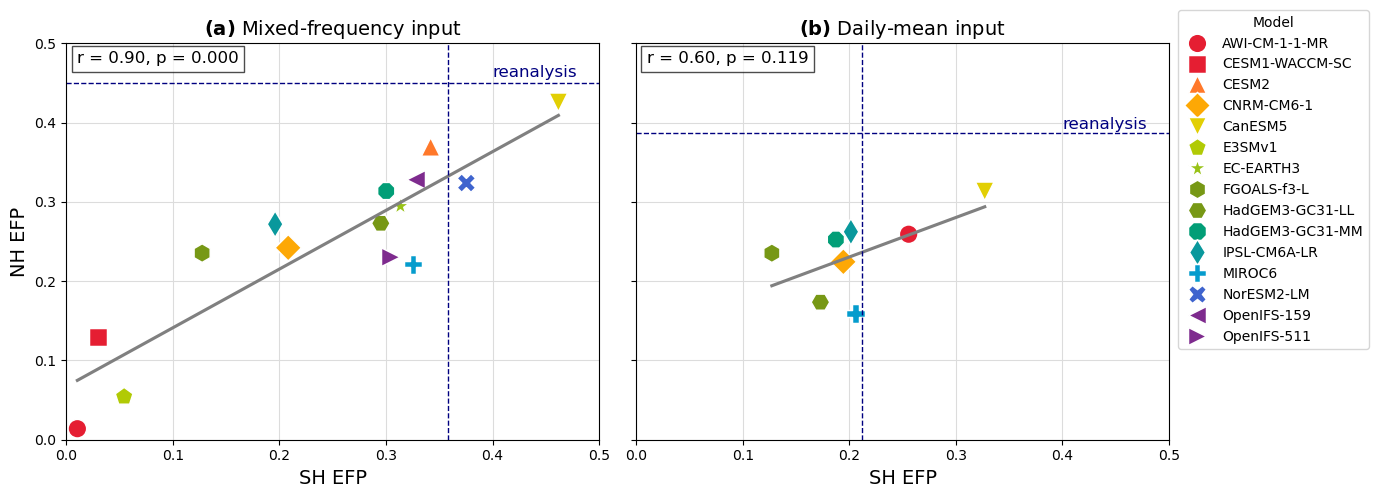

In [63]:
# colours
from pypalettes import load_cmap
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import os

cmap = load_cmap("Rainbow")
models = og_efp['model'].unique()
colors = [cmap(i / (len(models) - 1)) for i in range(len(models))]
palette = dict(zip(models, colors))

# Provide enough unique filled markers for all models
markers = ['o', 's', '^', 'D', 'v', 'p', '*', 'h', 'H', '8', 'd', 'P', 'X', '<', '>', '1', '2', '3', '4']
# Ensure we have enough markers for all models
style_markers = markers[:len(models)]

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True, sharey=True)

# Panel (a)
sns.regplot(ax=axes[0], data=og_efp, x='efp_sh', y='efp_nh',
            scatter_kws={'color': 'white'}, line_kws={"color": "gray"}, ci=None)
sns.scatterplot(ax=axes[0], data=og_efp, x='efp_sh', y='efp_nh',
                hue='model', style='model', s=180, palette=palette, markers=style_markers)
r, p = sp.stats.pearsonr(x=og_efp['efp_nh'], y=og_efp['efp_sh'])
axes[0].text(0.02, 0.95, f"r = {r:.2f}, p = {p:.3f}", transform=axes[0].transAxes,
             bbox=dict(facecolor="white", alpha=0.7), fontsize=12)
axes[0].text(0.8, 0.915, f"reanalysis", transform=axes[0].transAxes,
             color='navy', fontsize=12)
axes[0].set_xlabel('SH EFP', fontsize=14)
axes[0].set_ylabel('NH EFP', fontsize=14)
axes[0].set_xlim(0, 0.5)
axes[0].set_ylim(0, 0.5)
axes[0].axvline(og_jra_efp['efp_sh'].values[0], color='navy', linestyle='--', linewidth=1)
axes[0].axhline(og_jra_efp['efp_nh'].values[0], color='navy', linestyle='--', linewidth=1)
axes[0].set_title('$\\bf{(a)}$ Mixed-frequency input', fontsize=14)
axes[0].legend_.remove()  # Remove legend from left panel
axes[0].grid(visible=True, color='gainsboro')
axes[0].set_axisbelow(True)

axes[0].grid(visible=True, color='gainsboro')
axes[0].set_axisbelow(True)

# Panel (b)
# Get the models that are actually in pamip and their corresponding markers
pamip_models = pamip['model'].unique()
pamip_markers = [style_markers[list(models).index(model)] for model in pamip_models if model in models]

sns.regplot(ax=axes[1], data=pamip, x='efp_sh', y='efp_nh',
            scatter_kws={'color': 'white'}, line_kws={"color": "gray"}, ci=None)
sns.scatterplot(ax=axes[1], data=pamip, x='efp_sh', y='efp_nh',
                hue='model', style='model', s=180, palette=palette, markers=pamip_markers)
r, p = sp.stats.pearsonr(x=pamip['efp_nh'], y=pamip['efp_sh'])
axes[1].text(0.02, 0.95, f"r = {r:.2f}, p = {p:.3f}", transform=axes[1].transAxes,
             bbox=dict(facecolor="white", alpha=0.7), fontsize=12)
axes[1].text(0.8, 0.785, f"reanalysis", transform=axes[1].transAxes,
             color='navy', fontsize=12)
axes[1].set_xlabel('SH EFP', fontsize=14)
axes[1].set_ylabel('')  # no label on right subplot
axes[1].set_xlim(0, 0.5)
axes[1].set_ylim(0, 0.5)
axes[1].axvline(jra['efp_sh'].values[0], color='navy', linestyle='--', linewidth=1)
axes[1].axhline(jra['efp_nh'].values[0], color='navy', linestyle='--', linewidth=1)
axes[1].set_title('$\\bf{(b)}$ Daily-mean input', fontsize=14)
axes[1].grid(visible=True, color='gainsboro')
axes[1].set_axisbelow(True)
axes[1].legend_.remove()  # Remove legend from right panel

# Create a manual legend with all models from axes[0] and place it on the right
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(0.98, 1), loc='upper left', title='Model')

plt.tight_layout()
save_path = '/home/links/ct715/eddy_feedback/chapter1/zz_paper_plots'
# plt.savefig(os.path.join(save_path, 'sub-daily_vs_daily.png'), bbox_inches='tight')
plt.show()